In [1]:
import numpy as np
import cvxpy as cp
import osbdo as ob

# Create parameters

In [2]:
params = ob.ics_params(num_row=200, num_col=300, num_agents=20)

# Distributed solution with agent failure probability $p$

In [3]:
agents = ob.ics_agents(params)
g = ob.ics_coupling(agents, params)
prob = ob.Problem(agents = agents, g = g)

In [5]:
max_iter = 50
fail_probability = [0, 0.01, 0.02]
fail_bounds = {}
for p in fail_probability:
    agent_reply_pattern = [[np.random.rand()>p for j in range(max_iter+1)] for i in range(len(agents))]
    prob.solve(rel_gap=10**(-5), abs_gap=10**(-5), max_iter=max_iter, agent_reply_pattern=agent_reply_pattern)
    fail_bounds[p] = {'uk':prob.upper_bnd, 'lk':prob.lower_bnd}

k=0, rel_gap=inf, L=0.0, U=8.681210765589112
k=1, rel_gap=inf, L=0.0, U=8.681210765589112
k=2, rel_gap=inf, L=0.0, U=4.9597605745569675
k=3, rel_gap=inf, L=0.0, U=2.848624309511974
k=4, rel_gap=inf, L=0.0, U=1.6396244572304775
k=5, rel_gap=inf, L=0.0, U=0.9470673301023382
k=6, rel_gap=inf, L=0.0, U=0.5482191956861563
k=7, rel_gap=inf, L=0.0, U=0.31725216402807344
k=8, rel_gap=inf, L=0.0, U=0.182314404099701
k=9, rel_gap=inf, L=0.0, U=0.10403580968234302
k=10, rel_gap=inf, L=0.0, U=0.05916144760919476
k=11, rel_gap=inf, L=0.0, U=0.033555254821346525
k=12, rel_gap=inf, L=0.0, U=0.019031931235972622
k=13, rel_gap=inf, L=0.0, U=0.0107807529849097
k=14, rel_gap=48479370.95664422, L=1.2570985624340585e-10, U=0.006094334879440347
k=15, rel_gap=129774.75106006845, L=2.651026689885516e-08, U=0.0034403897976018
k=16, rel_gap=33819.27424476437, L=5.754875970813606e-08, U=0.0019463148357752075
k=17, rel_gap=16722.67006839007, L=6.569861531132485e-08, U=0.001098721966416677
k=18, rel_gap=6912.20370

# Centralized solution

In [3]:
h_cvx = ob.cvx_intersection_cvx_sets(params=params)[2]

# Plot

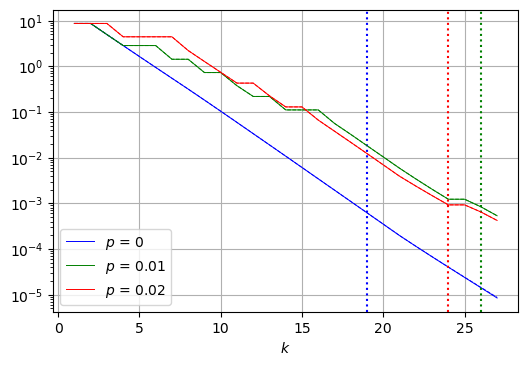

In [20]:
ob.plot_agent_failure_abs(fail_bounds=fail_bounds, fail_probability=fail_probability, h_true=h_cvx)